In [1]:
using DataFrames, StatsPlots, CSV, HTTP, StatsBase, DataFramesMeta

In [2]:
data = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/AgePeriodCohort/data/births.txt"
# Txt file uses tab spacing, provide as delimiter and manually give column names
births = CSV.File(HTTP.get(data).body, header=["year", "pop/1000","births"], skipto=2, delim="\t") |> DataFrame

function mean_age_45_54(yr)
    ages = 45:54
    ok = @subset(births, :year .<= yr - ages[1], :year .>= yr - ages[end])
    return (sum(ok.births .* Array(ages))) / sum(ok.births)
end

for yr in 1989:2015
    println(round(mean_age_45_54(yr), digits=1))
end;

49.8
49.7
49.8
49.9
49.9
49.8
49.8
49.8
49.8
49.8
49.7
49.6
49.6
49.7
49.7
49.6
49.6
49.6
49.5
49.5
49.5
49.4
49.4
49.3
49.3
49.3
49.3


Numbers here do not match original notebook

### Calculation

In [3]:
print( round( (.5/10)* (.006423 - .003064)/.003064, digits=4))

0.0548

### From life table

In [4]:
deathpr_by_age = [.003064, .003322, .003589, .003863, .004148, .004458, .004800, .005165, .005554, .005971]
deathpr_male = [.003244, .003571, .003926, .004309, .004719, .005156, .005622, .006121, .006656, .007222]
deathpr_female = [.002069, .002270, .002486, .002716, .002960, .003226, .003505, .003779, .004040, .004301];

### Sum it up

In [5]:
pop_file = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/AgePeriodCohort/data/US-EST00INT-ALLDATA.csv"
# Txt file uses tab spacing, provide as delimiter and manually give column names
pop = CSV.File(HTTP.get(pop_file).body) |> DataFrame;


In [6]:
years = 1989:2013

deathpr_1 = Array{Union{Float64,Missing}}(missing, length(years))
deathpr_2 = Array{Union{Float64,Missing}}(missing, length(years))
for i in 1:length(years)    
    ages_in_2000 = (2000-years[i]) .+ Array(45:54)
    ok = @subset(pop, :AGE .>= ages_in_2000[1], :AGE .<= ages_in_2000[end], :MONTH .== 4, :YEAR .== 2000)
    pop_male = ok.NHWA_MALE
    pop_female = ok.NHWA_FEMALE
    println(
        round(mean(Array(45:54), weights(pop_male)),digits=1), " ", round(mean(Array(45:54), weights(pop_female)), digits=1)
    )
    deathpr_1[i] = mean(deathpr_by_age, weights(pop_male .+ pop_female))
    deathpr_2[i] = sum(deathpr_male .* pop_male + deathpr_female .* pop_female) / sum(pop_male .+ pop_female)
end

49.1 49.2
49.1 49.2
49.2 49.2
49.1 49.1
49.0 49.1
49.1 49.1
49.1 49.1
49.1 49.2
49.2 49.2
49.2 49.2
49.2 49.3
49.3 49.3
49.4 49.4
49.4 49.4
49.3 49.3
49.4 49.4
49.4 49.4
49.4 49.4
49.4 49.4
49.5 49.5
49.5 49.5
49.5 49.5
49.6 49.6
49.7 49.7
49.7 49.7


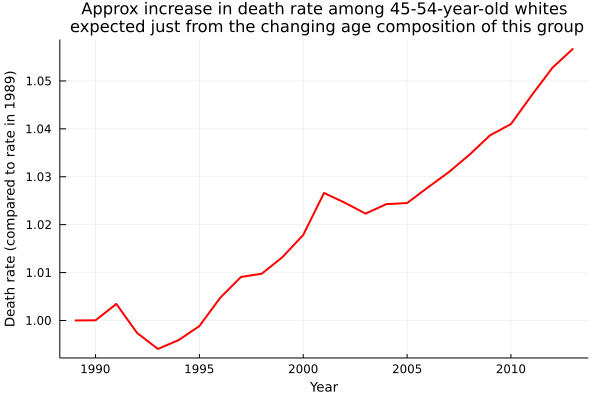

In [7]:
plot(
    years, deathpr_2 ./ deathpr_2[1],
    color="red",
    xlabel="Year",
    ylabel="Death rate (compared to rate in 1989)",
    title="Approx increase in death rate among 45-54-year-old whites\n expected just from the changing age composition of this group",
    linewidth=2,
    legend=false,
    titlefontsize=11,
    labelfontsize=9
    )